<img src="http://wandb.me/logo-im-png" width="400" alt="Weights & Biases" />
<!--- @wandbcode{rdkit_molecules} -->

# Logging RDKit Molecular Data

[RDKit](https://www.rdkit.org/) is a popular open source toolkit for cheminformatics. In version `0.12.7` of the `wandb` client library, we added `wandb.Molecule` support for `rdkit` data formats. In particular, you can now initialize `wandb.Molecule` from [SMILES](https://en.wikipedia.org/wiki/Simplified_molecular-input_line-entry_system) strings, [`rdkit.Chem.rdchem.Mol`](https://www.rdkit.org/docs/source/rdkit.Chem.rdchem.html#rdkit.Chem.rdchem.Mol) objects, and files in `rdkit`-supported formats, such as `.mol`.

This Colab showcases how you can log `rdkit` molecular data in Weights & Biases and visualize it both in 3D and 2D.


###[Click here](https://wandb.ai/anmolmann/rdkit_molecules) to view and interact with a live W&B Dashboard built with this notebook.

In [ ]:
!pip install wandb -qU

In [ ]:

import wandb

In [ ]:
from google.colab import userdata
import wandb

try:
  wandb.login(key=userdata.get('WANDB_API_KEY'))
except:
  print("Please make sure you have added your WANDB_API_KEY to Colab secrets.")

Please make sure you have added your WANDB_API_KEY to Colab secrets.


In [ ]:
wandb.login()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: nagendraslv619 (nagendraslv619-biotecnika) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

First, add your Weights & Biases API key to Colab's secrets manager. Click on the "🔑" icon in the left sidebar, then click "Add new secret". Name the secret `WANDB_API_KEY` and paste your API key in the value field.

In [ ]:
!pip install rdkit -qqq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.2/36.2 MB 41.3 MB/s eta 0:00:00


## Overview
In this example, we're using Google Colab as a convenient hosted environment, but you can run your own training scripts from anywhere and visualize metrics and data with W&B's experiment tracking tool.

As an example, we will initialize `wandb.Molecule` objects from different `rdkit` formats and log them to a `wandb.Table` for visualization.

In [ ]:
import datetime
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem, Draw

Let us save a `.mol` file:

In [ ]:
resveratrol = Chem.MolFromSmiles("Oc1ccc(cc1)C=Cc1cc(O)cc(c1)O")
Chem.MolToMolFile(resveratrol, "resveratrol.mol")

## 2D Views of a Molecule
First, we'll log 2D views of molecule using the [`wandb.Image`](https://docs.wandb.ai/ref/python/data-types/image) data type.

In [ ]:
def mol_to_pil_image(molecule: Chem.rdchem.Mol, width: int = 300, height: int = 300) -> "PIL.Image":
    Chem.AllChem.Compute2DCoords(molecule)
    Chem.AllChem.GenerateDepictionMatching2DStructure(molecule, molecule)
    pil_image = Chem.Draw.MolToImage(molecule, size=(width, height))
    return pil_image

## 3D Representations of Molecules
Now, let us log 3D representations of a few sample molecules using a [`wandb.Table`](https://docs.wandb.ai/ref/python/data-types/table).

In [ ]:
smiles = {
    "resveratrol": "Oc1ccc(cc1)C=Cc1cc(O)cc(c1)O",
    "ciprofloxacin": "C1CC1N2C=C(C(=O)C3=CC(=C(C=C32)N4CCNCC4)F)C(=O)O",
    "acetic acid": "CC(=O)O",
}

acetic_acid = Chem.MolFromSmiles(smiles["acetic acid"])
ciprofloxacin = Chem.MolFromSmiles(smiles["ciprofloxacin"])

data = [
    {
        "name": "resveratrol",
        "smiles": smiles["resveratrol"],
        # wandb.Molecule from a .mol file:
        "molecule": wandb.Molecule.from_rdkit("resveratrol.mol"),
        "molecule_2D": wandb.Image(mol_to_pil_image(resveratrol))
    },
    {
        "name": "ciprofloxacin",
        "smiles": smiles["ciprofloxacin"],
        # wandb.Molecule from a SMILES string:
        "molecule": wandb.Molecule.from_smiles(smiles["ciprofloxacin"]),
        "molecule_2D": wandb.Image(mol_to_pil_image(ciprofloxacin))
    },
    {
        "name": "acetic acid",
        "smiles": smiles["acetic acid"],
        # wandb.Molecule from an rdkit.Chem.rdchem.Mol object:
        "molecule": wandb.Molecule.from_rdkit(acetic_acid),
        "molecule_2D": wandb.Image(mol_to_pil_image(acetic_acid))
    },
]

## Log Molecular Data to W&B

In [ ]:
run = wandb.init(project="rdkit_molecules")

dataframe = pd.DataFrame.from_records(data)
table = wandb.Table(dataframe=dataframe)
wandb.log(
    {
        "table": table,
        "molecules": [substance.get("molecule") for substance in data],
    }
)

run.finish()

In [ ]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
try:
    wandb_export_df = pd.read_csv('wandb_export_2025-10-21T09_15_35.609+05_30.csv')

    # Display the first few rows of the DataFrame
    display(wandb_export_df.head())
except FileNotFoundError:
    print("Error: The file 'wandb_export_2025-10-21T09_15_35.609+05_30.csv' was not found. Please make sure the file is uploaded to your Colab environment.")
except Exception as e:
    print(f"An error occurred while reading the CSV file: {e}")

,name,smiles,moleculefilepath,molecule_2Dfilepath
0,resveratrol,Oc1ccc(cc1)C=Cc1cc(O)cc(c1)O,media/molecule/602cedcf4078a18a6994/molecules_...,media/images/ed576403a2ed67505763.png
1,ciprofloxacin,C1CC1N2C=C(C(=O)C3=CC(=C(C=C32)N4CCNCC4)F)C(=O)O,media/molecule/4e0da91f79b4db806bfd/molecules_...,media/images/1fc35d2f6b6ab8c1cdc9.png
2,acetic acid,CC(=O)O,media/molecule/8fd9ade734470ec05fdb/molecules_...,media/images/fa3f5a83bf007d882dc3.png


Displaying 2D representations of the molecules:
Molecule: resveratrol


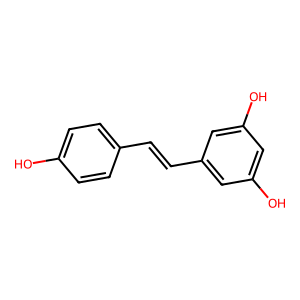

Molecule: ciprofloxacin


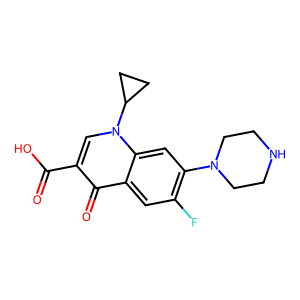

Molecule: acetic acid


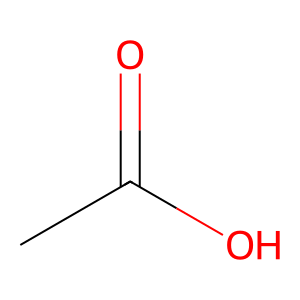

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
import pandas as pd
from IPython.display import display

# Assuming wandb_export_df is already loaded from the previous step
if 'wandb_export_df' in locals() and not wandb_export_df.empty:
    print("Displaying 2D representations of the molecules:")

    for index, row in wandb_export_df.iterrows():
        smiles = row['smiles']
        name = row['name']
        try:
            mol = Chem.MolFromSmiles(smiles)
            if mol:
                print(f"Molecule: {name}")
                img = Draw.MolToImage(mol)
                display(img)
            else:
                print(f"Could not generate molecule from SMILES: {smiles} for {name}")
        except Exception as e:
            print(f"An error occurred while processing molecule {name} with SMILES {smiles}: {e}")
else:
    print("wandb_export_df DataFrame not found or is empty. Please run the cell to load the CSV first.")

In [ ]:
!pip install py3Dmol -q

In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem
import py3Dmol
import pandas as pd
from IPython.display import display

# Assuming wandb_export_df is already loaded from the previous step
if 'wandb_export_df' in locals() and not wandb_export_df.empty:
    print("Generating and displaying 3D representations of the molecules:")

    for index, row in wandb_export_df.iterrows():
        smiles = row['smiles']
        name = row['name']
        try:
            mol = Chem.MolFromSmiles(smiles)
            if mol:
                # Add hydrogens and generate 3D coordinates
                mol = Chem.AddHs(mol)
                AllChem.EmbedMolecule(mol, AllChem.ETKDGv2())
                AllChem.MMFFOptimizeMolecule(mol)

                # Create a py3Dmol view
                view = py3Dmol.view(width=400, height=400)
                view.addModel(Chem.MolToMolBlock(mol), 'mol')
                view.setStyle({'stick':{}})
                view.zoomTo()
                print(f"Molecule: {name}")
                view.show()
            else:
                print(f"Could not generate molecule from SMILES: {smiles} for {name}")
        except Exception as e:
            print(f"An error occurred while processing molecule {name} with SMILES {smiles}: {e}")
else:
    print("wandb_export_df DataFrame not found or is empty. Please run the cell to load the CSV first.")

Generating and displaying 3D representations of the molecules:
Molecule: resveratrol


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Molecule: ciprofloxacin


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Molecule: acetic acid


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

# Here is a summary of what we've done in this Google Colab notebook:

    Setup:
     We started by installing necessary libraries, including wandb for logging and rdkit for cheminformatics tasks.
    We also set up Weights & Biases login to connect the notebook to your W&B account.
    Molecular Data Preparation:
     We prepared some sample molecular data, including getting RDKit Mol objects from SMILES strings and saving a molecule to a .mol file.
    Weights & Biases Logging:
     We used wandb.Molecule and wandb.Image data types to log the molecular data (including 3D structures and 2D images) to a Weights & Biases run within a wandb.Table.
    Data Export:
     You exported the logged data from Weights & Biases, which resulted in a CSV file (wandb_export_...csv) and a PNG image (wandb_export_...png).
    Data Visualization in Notebook:
    We then focused on visualizing the exported data within the Colab notebook:
        We loaded the exported CSV file into a pandas DataFrame to access the molecular information (names, SMILES, file paths).
        We displayed the exported PNG image file.
        We generated and displayed 2D visualizations of the molecules directly in the notebook using RDKit and the SMILES strings from the CSV.
        Finally, we generated 3D conformations from the SMILES strings using RDKit and visualized them interactively in the notebook using the py3Dmol library.

In essence, the notebook demonstrates how to use Weights & Biases to log RDKit molecular data for visualization on the W&B dashboard, and how to then export that data and visualize it in different formats directly within the Google Colab environment.
